In [ ]:
from keras.preprocessing import sequence
import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np


from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

%matplotlib inline

version = '01'

In [ ]:
right = pd.read_csv("../data/right.txt", header=None).values.tolist()
left = pd.read_csv("../data/left.txt", header=None).values.tolist()

In [3]:
batch_size = 200
batch_right = [right[i:i + batch_size] for i in range(0, len(right), batch_size)]
batch_left = [left[i:i + batch_size] for i in range(0, len(left), batch_size)]

X = np.array(batch_right + batch_left)
y = np.array([0]*len(batch_right) + [1]*len(batch_left))

In [4]:
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (600, 200, 2)
y shape: (600,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_dev, X_test, y_dev, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=1)

In [6]:
model = Sequential()
model.add(LSTM(256, input_shape=(batch_size, 2)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               265216    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 265,473
Trainable params: 265,473
Non-trainable params: 0
_________________________________________________________________


In [7]:
adam = Adam(lr=0.001)
chk = ModelCheckpoint(f'../models/best_model_{version}.pkl', monitor='acc', save_best_only=True, mode='max', verbose=0) #monitor='val_acc'
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history_training = model.fit(X_train, y_train, epochs=200, batch_size=64, callbacks=[chk], validation_data=(X_dev, y_dev))

Instructions for updating:
Use tf.cast instead.
Train on 420 samples, validate on 210 samples
Epoch 1/200
420/420 [==============================] - 3s 8ms/step - loss: 0.7155 - acc: 0.4929 - val_loss: 0.6672 - val_acc: 0.5667
Epoch 2/200
420/420 [==============================] - 2s 5ms/step - loss: 0.6679 - acc: 0.5690 - val_loss: 0.6435 - val_acc: 0.6000
Epoch 3/200
420/420 [==============================] - 2s 5ms/step - loss: 0.6474 - acc: 0.6143 - val_loss: 0.6382 - val_acc: 0.6238
Epoch 4/200
420/420 [==============================] - 2s 4ms/step - loss: 0.6469 - acc: 0.6262 - val_loss: 0.6349 - val_acc: 0.6333
Epoch 5/200
420/420 [==============================] - 2s 4ms/step - loss: 0.6375 - acc: 0.6357 - val_loss: 0.6351 - val_acc: 0.6190
Epoch 6/200
420/420 [==============================] - 2s 5ms/step - loss: 0.6401 - acc: 0.6262 - val_loss: 0.6278 - val_acc: 0.6476
Epoch 7/200
420/420 [==============================] - 2s 6ms/step - loss: 0.6364 - acc: 0.6286 - val_loss: 

Epoch 60/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5837 - acc: 0.6738 - val_loss: 0.5595 - val_acc: 0.7190
Epoch 61/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5859 - acc: 0.6905 - val_loss: 0.5594 - val_acc: 0.7476
Epoch 62/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5812 - acc: 0.6857 - val_loss: 0.5578 - val_acc: 0.7095
Epoch 63/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5857 - acc: 0.7000 - val_loss: 0.5674 - val_acc: 0.7333
Epoch 64/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5823 - acc: 0.6857 - val_loss: 0.5592 - val_acc: 0.7000
Epoch 65/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5864 - acc: 0.6690 - val_loss: 0.5593 - val_acc: 0.7048
Epoch 66/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5856 - acc: 0.6833 - val_loss: 0.5716 - val_acc: 0.7238
Epoch 67/200
420/420 [==============================] - 2s 6ms

Epoch 121/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5582 - acc: 0.7024 - val_loss: 0.5389 - val_acc: 0.7190
Epoch 122/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5624 - acc: 0.7048 - val_loss: 0.5328 - val_acc: 0.7286
Epoch 123/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5630 - acc: 0.6857 - val_loss: 0.5378 - val_acc: 0.7333
Epoch 124/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5594 - acc: 0.7000 - val_loss: 0.5317 - val_acc: 0.7667
Epoch 125/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5514 - acc: 0.7262 - val_loss: 0.5244 - val_acc: 0.7810
Epoch 126/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5590 - acc: 0.7167 - val_loss: 0.5203 - val_acc: 0.7571
Epoch 127/200
420/420 [==============================] - 2s 6ms/step - loss: 0.5492 - acc: 0.7238 - val_loss: 0.5288 - val_acc: 0.7429
Epoch 128/200
420/420 [==============================] 

420/420 [==============================] - 3s 6ms/step - loss: 0.5470 - acc: 0.7190 - val_loss: 0.5316 - val_acc: 0.7333
Epoch 182/200
420/420 [==============================] - 3s 6ms/step - loss: 0.5543 - acc: 0.7143 - val_loss: 0.5162 - val_acc: 0.7524
Epoch 183/200
420/420 [==============================] - 3s 6ms/step - loss: 0.5486 - acc: 0.7214 - val_loss: 0.5239 - val_acc: 0.7476
Epoch 184/200
420/420 [==============================] - 4s 9ms/step - loss: 0.5511 - acc: 0.7071 - val_loss: 0.5187 - val_acc: 0.7429
Epoch 185/200
420/420 [==============================] - 4s 8ms/step - loss: 0.5570 - acc: 0.7024 - val_loss: 0.5156 - val_acc: 0.7429
Epoch 186/200
420/420 [==============================] - 3s 7ms/step - loss: 0.5609 - acc: 0.6976 - val_loss: 0.5403 - val_acc: 0.7524
Epoch 187/200
420/420 [==============================] - 3s 6ms/step - loss: 0.5530 - acc: 0.7095 - val_loss: 0.5259 - val_acc: 0.7476
Epoch 188/200
420/420 [==============================] - 3s 7ms/step 

In [8]:
#loading the model and checking accuracy on the test data
model = load_model(f'../models/best_model_{version}.pkl')

In [9]:
test_preds = model.predict_classes(X_test)
accuracy_score(y_test, test_preds)

0.7047619047619048

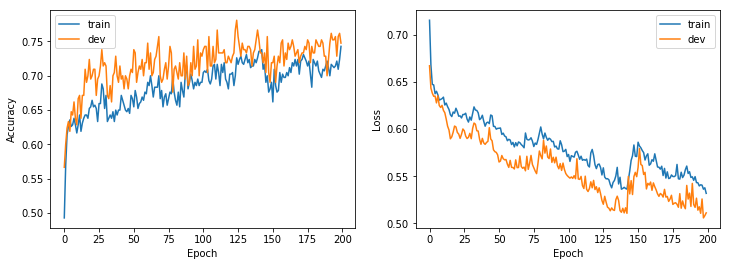

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(history_training.history['acc'], label='train')
ax1.plot(history_training.history['val_acc'], label='dev')

ax2.plot(history_training.history['loss'], label='train')
ax2.plot(history_training.history['val_loss'], label='dev')

ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.legend()
ax2.legend()

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')

fig.savefig(f'../plots/model_{version}.png', bbox_inches='tight')

In [ ]:
XX = np.array([x for x, t in zip(list(X_test), list(y_test)) if t==0])

test_preds = model.predict_classes(XX)
sum(test_preds)/XX.shape[0]

In [ ]:
history_training

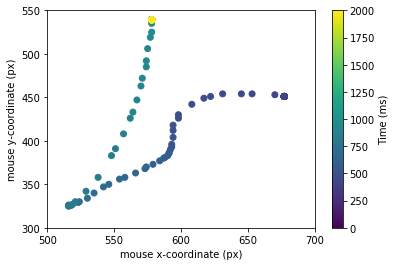

In [100]:
import matplotlib.cm as cm
batch_index = 26

colors = np.linspace(0, 2000, X.shape[1])

sc = plt.scatter(X[batch_index,:,0], X[batch_index,:,1] , c=colors, cmap='viridis')
clb = plt.colorbar()
clb.set_label('Time (ms)')
plt.xlabel('mouse x-coordinate (px)')
plt.ylabel('mouse y-coordinate (px)')
plt.xlim(500, 700)
plt.ylim(300, 550)
plt.xticks(np.arange(500, 701, 50))

plt.savefig('../plots/batch_example.png')

In [105]:
max(history_training.history['val_acc'])

0.7809523820877076